Step1. Read Data
Step2. Check NUll Imputation
Step3. Encoding
Step4. Standard Scalar(Optional)
Step5. Test Strain,Split up
Step6. Training the model
Step7. Prediction
Step.8 Evaluation

Microsoft : Classifying Cybersecurity Incidents with Machine Learning

Step1. Read the 1lakh data

In [13]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'GUIDE_Train.csv'

# Read the first 10,000 rows from the CSV file
data = pd.read_csv(file_path, nrows=1000000)

# Display the first few rows to verify
data.head()


C:\Users\Anandvj\AppData\Local\Temp\ipykernel_15292\1315641381.py:7: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, nrows=1000000)


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


step2.check the null columns in ascending order

In [14]:
nullvalues = data.isna().sum()
nullvalues.sort_values(ascending=False)

ResourceType          999235
ActionGrouped         994200
ActionGranular        994200
ThreatFamily          992230
EmailClusterId        989733
AntispamDirection     981416
Roles                 977147
SuspicionLevel        848126
LastVerdict           764980
MitreTechniques       574909
IncidentGrade           5289
Timestamp                  0
Id                         0
EntityType                 0
DetectorId                 0
AlertTitle                 0
Category                   0
OrgId                      0
IncidentId                 0
AlertId                    0
EvidenceRole               0
AccountObjectId            0
AccountName                0
Sha256                     0
DeviceId                   0
Url                        0
AccountSid                 0
AccountUpn                 0
IpAddress                  0
ApplicationId              0
RegistryValueData          0
RegistryValueName          0
RegistryKey                0
NetworkMessageId           0
DeviceName    

Step 3. Dropping the Null columns

In [15]:
import pandas as pd

# List of columns to drop based on their null values
columns_to_drop = [
    'ResourceType', 
    'ActionGrouped', 
    'ActionGranular', 
    'ThreatFamily', 
    'EmailClusterId', 
    'AntispamDirection', 
    'Roles', 
    'SuspicionLevel', 
    'LastVerdict', 
    'MitreTechniques'
]

# Drop the specified columns
data = data.drop(columns=columns_to_drop)

# Check the remaining columns
print("Remaining columns after dropping:")
print(data.columns)


Remaining columns after dropping:
Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')


Step4. Checking the columns dropped or not

In [16]:
data.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')

Step5. Checking the Head Data

In [17]:
import pandas as pd

# Load the dataset
#data = pd.read_csv('Guide_Train_Limited.csv')

# Display the first few rows of the dataset
print(data.head())

# Display summary information
print(data.info())

# Check for missing values
print(data.isnull().sum())


              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category   IncidentGrade EntityType  ...  \
0           7           6      InitialAccess    TruePositive         Ip  ...   
1          58          43       Exfiltration   FalsePositive       User  ...   
2         423         298      InitialAccess   FalsePositive        Url  ...   
3           2           2  CommandAndControl  BenignPositive        Url  ...   
4           9          74          Execution    TruePositive       User  ...   

  ApplicationName  OAuthApplicationId  FileName  FolderPath  ResourceIdNam

step6. Checking the feature engineering

In [18]:
# Assuming you have a 'timestamp' column in your dataset
if 'Timestamp' in data.columns:
    # Convert 'timestamp' to datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    
    # Extract features from the timestamp
    data['hour'] = data['Timestamp'].dt.hour
    data['day_of_week'] = data['Timestamp'].dt.dayofweek
    data['month'] = data['Timestamp'].dt.month
    data['year'] = data['Timestamp'].dt.year

    # Drop the original 'timestamp' column if it's no longer needed
    data = data.drop(columns=['Timestamp'])

print("Feature Engineering Completed:\n", data.head())


Feature Engineering Completed:
               Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0   180388628218      0         612   123247           7           6   
1   455266534868     88         326   210035          58          43   
2  1056561957389    809       58352   712507         423         298   
3  1279900258736     92       32992   774301           2           2   
4   214748368522    148        4359   188041           9          74   

            Category   IncidentGrade EntityType EvidenceRole  ...  \
0      InitialAccess    TruePositive         Ip      Related  ...   
1       Exfiltration   FalsePositive       User     Impacted  ...   
2      InitialAccess   FalsePositive        Url      Related  ...   
3  CommandAndControl  BenignPositive        Url      Related  ...   
4          Execution    TruePositive       User     Impacted  ...   

   ResourceIdName  OSFamily  OSVersion  CountryCode  State   City  hour  \
0            3586         5         66       

In [19]:
data.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'hour', 'day_of_week', 'month', 'year'],
      dtype='object')

Step7.Exploaratory Data Analysis

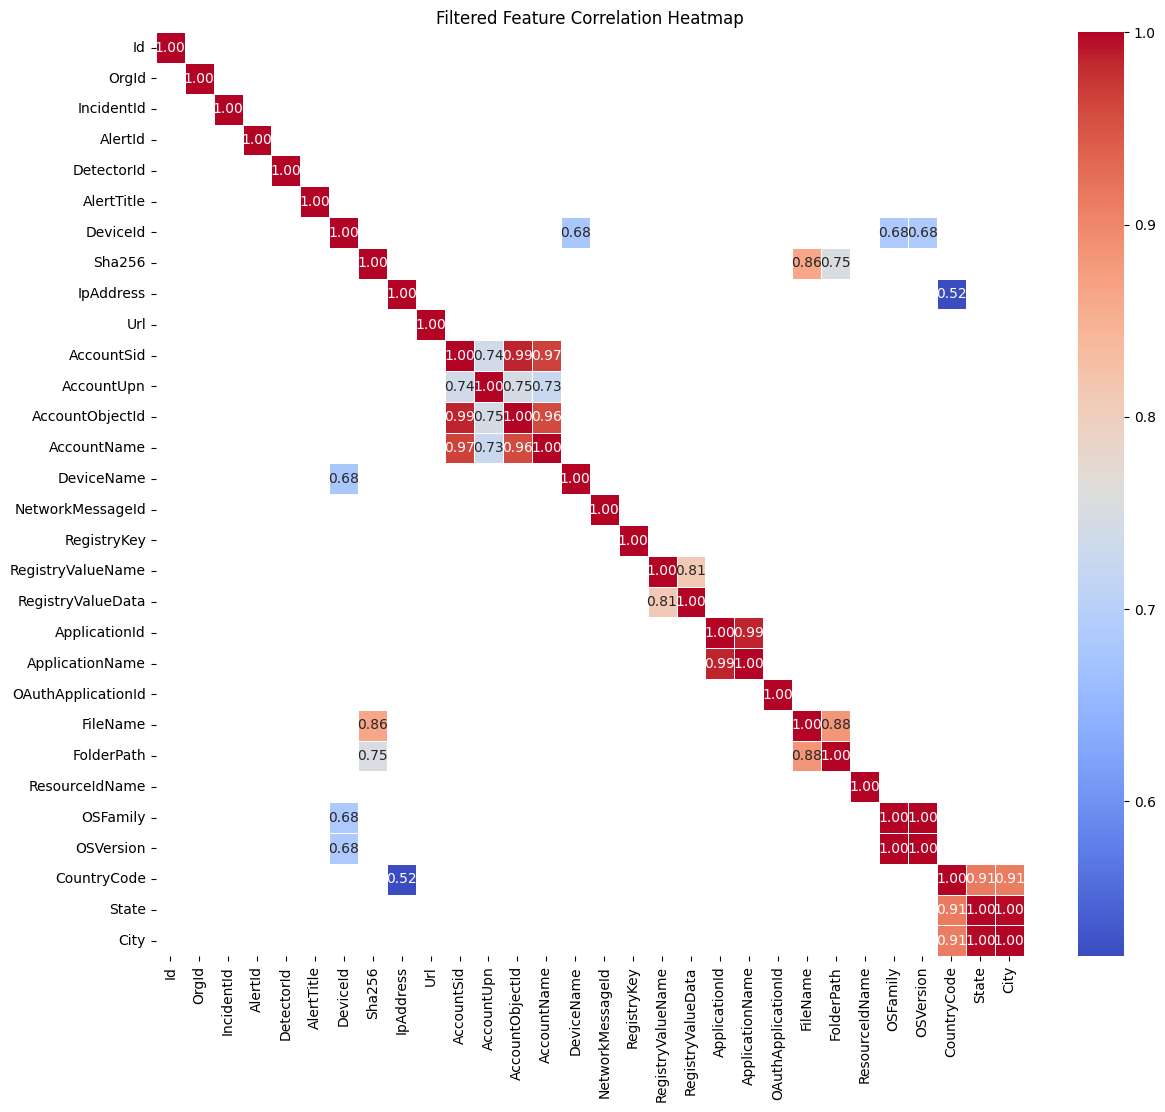

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your pandas DataFrame
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Remove columns with low variance
numeric_data = numeric_data.loc[:, numeric_data.var() > 0.1]

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Optionally, filter to show only high correlations (absolute value > 0.5)
filtered_corr_matrix = corr_matrix[abs(corr_matrix) > 0.5]

# Increase the size of the heatmap for better readability
plt.figure(figsize=(14, 12))

# Plot the heatmap with annotations
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Set title and display the plot
plt.title('Filtered Feature Correlation Heatmap')
plt.show()


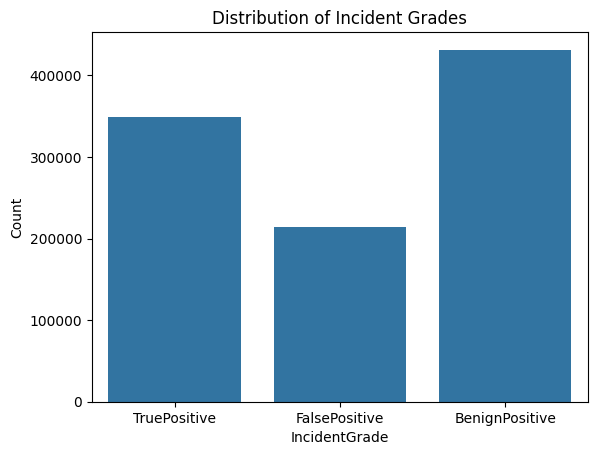

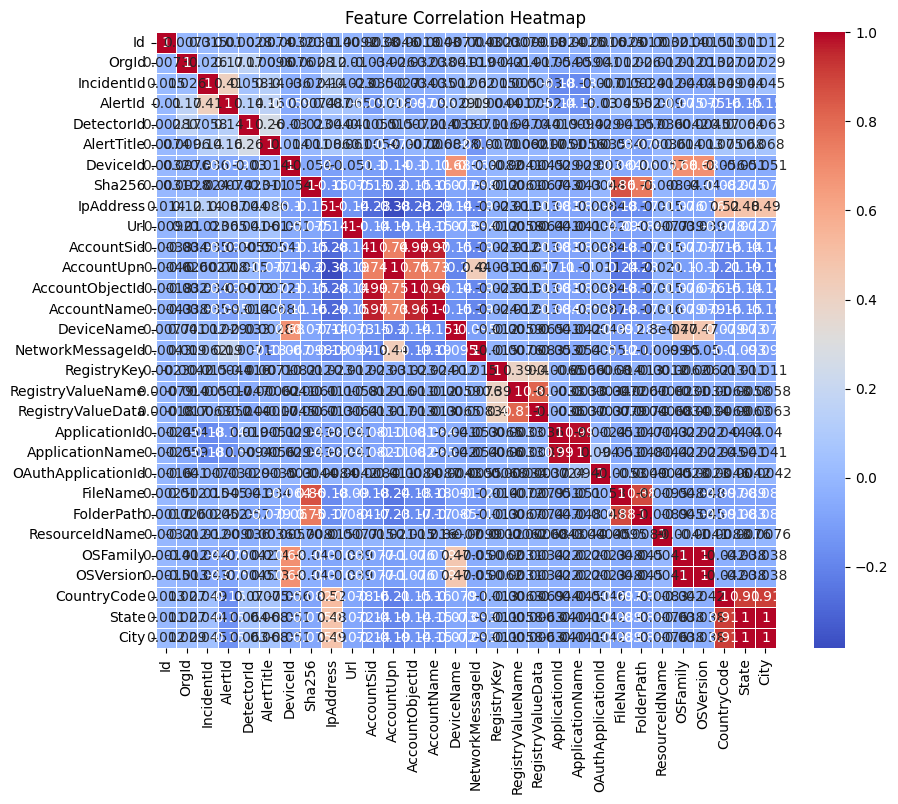

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a pandas DataFrame
# Plot the distribution of the target variable (Assuming the target is 'IncidentGrade')
sns.countplot(x='IncidentGrade', data=data)
plt.title('Distribution of Incident Grades')
plt.xlabel('IncidentGrade')
plt.ylabel('Count')
plt.show()

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap to understand relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


Step8. Encoding the numerical and categorical variables

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Handle missing values
# For numerical columns, use mean imputation
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.fillna(data_numeric.mean(), inplace=True)

# For categorical columns, use mode imputation (most frequent value)
data_categorical = data.select_dtypes(include=['object'])
data_categorical.fillna(data_categorical.mode().iloc[0], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data_categorical.columns:
    le = LabelEncoder()
    data_categorical[column] = le.fit_transform(data_categorical[column])
    label_encoders[column] = le

# Combine back the numeric and categorical data
data = pd.concat([data_numeric, data_categorical], axis=1)

# Separate features and target variable
X = data.drop('IncidentGrade', axis=1)
y = data['IncidentGrade']

# Standardize numerical features
scaler = StandardScaler()

# Standardize only the numerical columns
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Recreate the final DataFrame by combining the scaled numerical features with the categorical ones
X_scaled = pd.DataFrame(X_numeric_scaled, columns=X_numeric.columns, index=X.index)
X_scaled = pd.concat([X_scaled, X.select_dtypes(include=['object', 'bool'])], axis=1)

# Split the dataset into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)




Step 8. Make Prdictions and evaluate the model

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Train a logistic regression model
model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred, average='weighted'))
print("Recall:", recall_score(y_val, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


C:\Users\Anandvj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.602925
Precision: 0.5997527905785356
Recall: 0.602925
F1 Score: 0.5753716752084943

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.78      0.67     87351
           1       0.56      0.19      0.28     42749
           2       0.65      0.64      0.64     69900

    accuracy                           0.60    200000
   macro avg       0.60      0.53      0.53    200000
weighted avg       0.60      0.60      0.58    200000

Confusion Matrix:
[[67773  4422 15156]
 [25531  7947  9271]
 [23168  1867 44865]]
